# Regex - ab*c

Here we implement FSM, that matches regular expression `ab*c`, using Python Coroutines

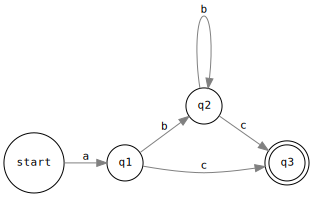

In [6]:
from graphviz import Source
with open("./regex-1.dot", "r") as f:
    gr = Source(f.read())
gr

In [7]:
# def prime(fn): # I guess this is needed to 'prime' the generator
#     def wrapper(*args, **kwargs):
#         v = fn(*args, **kwargs)
#         #v.send(None) # here is is done
#         return v
#     return wrapper

In [8]:
class RegexFSM:
    def __init__(self):

        self.start = self._create_start()
        self.start.send(None) # Advance to first yield
        
        self.q1 = self._create_q1()
        self.q1.send(None) # Advance to first yield
        
        self.q2 = self._create_q2()
        self.q2.send(None) # Advance to first yield
        
        self.q3 = self._create_q3()
        self.q3.send(None) # Advance to first yield

        self.current_state = self.start
        self.stopped = False
        
    def send(self, char):
        try:
            self.current_state.send(char)
        except StopIteration:
            self.stopped = True
        
    def does_match(self):
        if self.stopped:
            return False
        return self.current_state == self.q3

    #@prime
    def _create_start(self):
        while True:
            char = yield
            if char == 'a':
                print('Start, go to Q1')
                self.current_state = self.q1
            else:
                print('Start, Break')
                break
    
    #@prime
    def _create_q1(self):
        while True:
            char = yield
            if char == 'b':
                print('Q1, go to Q2')
                self.current_state = self.q2
            elif char == 'c':
                print('Q1, go to Q3')
                self.current_state = self.q3
            else:
                print('Q1, Break')
                break

    #@prime
    def _create_q2(self):
        while True:
            char = yield
            if char == 'b':
                print('Q2, stay @Q2')
                self.current_state = self.q2
            elif char == 'c':
                print('Q2, go to Q3')
                self.current_state = self.q3
            else:
                print('Q2, Break')
                break

    #@prime
    def _create_q3(self):
        while True:
            char = yield
            print('Q3, Completed')
            break

In [9]:
def grep_regex(text):
    evaluator = RegexFSM()
    for ch in text:
        evaluator.send(ch)
    return evaluator.does_match()

In [10]:
grep_regex("a")

Start, go to Q1


False

In [11]:
grep_regex("ab")

Start, go to Q1
Q1, go to Q2


False

In [12]:
grep_regex("ac")

Start, go to Q1
Q1, go to Q3


True

In [9]:
grep_regex("abc")

Start, go to Q1
Q1, go to Q2
Q2, go to Q3


True

In [10]:
grep_regex("aba")

Start, go to Q1
Q1, go to Q2
Q2, Break


False

In [13]:
grep_regex("abbbbbbbc")

Start, go to Q1
Q1, go to Q2
Q2, stay @Q2
Q2, stay @Q2
Q2, stay @Q2
Q2, stay @Q2
Q2, stay @Q2
Q2, stay @Q2
Q2, go to Q3


True

In [12]:
grep_regex("abcc")

Start, go to Q1
Q1, go to Q2
Q2, go to Q3
Q3, Completed


False

In [13]:
grep_regex("abcd")

Start, go to Q1
Q1, go to Q2
Q2, go to Q3
Q3, Completed


False

In [14]:
grep_regex("bcbc")

Start, Break


False